In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

In [2]:
# read csv:
#df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=';', index_col=0,keep_default_na=False).T
df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=',')
df.head(9)
# re-set the index (row headers):
df2 = df.set_index(['Country/Region','Province/State'])
#remove spurious last column:
df2b = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
df2b.head(5)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,2,3,5,7,8,8,14,14,...,43,43,43,47,48,50,50,50,53,59
Japan,NaN,36.0000,138.0000,2,1,2,2,4,4,7,7,...,274,293,331,360,420,461,502,511,581,639
Singapore,NaN,1.2833,103.8333,0,1,3,3,4,5,7,7,...,108,110,110,117,130,138,150,150,160,178
Nepal,NaN,28.1667,84.2500,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Malaysia,NaN,2.5000,112.5000,0,0,0,3,4,4,4,7,...,29,36,50,50,83,93,99,117,129,149


In [3]:
# transpose:
df3 = df2b.T
df3.head(5)

Country/Region Thailand  Japan Singapore    Nepal Malaysia           Canada  \
Province/State      NaN    NaN       NaN      NaN      NaN British Columbia   
Lat                15.0   36.0    1.2833  28.1667      2.5          49.2827   
Long              101.0  138.0  103.8333  84.2500    112.5        -123.1207   
1/22/20             2.0    2.0    0.0000   0.0000      0.0           0.0000   
1/23/20             3.0    1.0    1.0000   0.0000      0.0           0.0000   
1/24/20             5.0    2.0    3.0000   0.0000      0.0           0.0000   

Country/Region       Australia                       Cambodia  ...         US  \
Province/State New South Wales  Victoria Queensland       NaN  ... Beadle, SD   
Lat                   -33.8688  -37.8136   -28.0167   11.5500  ...    44.4797   
Long                  151.2093  144.9631   153.4000  104.9167  ...   -98.2213   
1/22/20                 0.0000    0.0000     0.0000    0.0000  ...     0.0000   
1/23/20                 0.0000    0.0000     0.0000    0.0000  ...     0.0000   
1/24/20                 0.0000    0.0000     0.0000    0.0000  ...     0.0000   

Country/Region                                                          \
Province/State Charles Mix, SD Davison, SD Minnehaha, SD Bon Homme, SD   
Lat                    43.0985     43.7242       43.6632       42.9815   
Long                  -98.3965    -98.2213      -96.8351      -97.8722   
1/22/20                 0.0000      0.0000        0.0000        0.0000   
1/23/20                 0.0000      0.0000        0.0000        0.0000   
1/24/20                 0.0000      0.0000        0.0000        0.0000   

Country/Region                                                                  
Province/State Socorro, NM Bernalillo, NM Oakland, MI Wayne, MI New Castle, DE  
Lat                33.8837        35.0178     42.5922   42.2791        39.5393  
Long             -106.7235      -106.6291    -83.3362  -83.3362       -75.6674  
1/22/20             0.0000         0.0000      0.0000    0.0000         0.0000  
1/23/20             0.0000         0.0000      0.0000    0.0000         0.0000  
1/24/20             0.0000         0.0000      0.0000    0.0000         0.0000  

[5 rows x 404 columns]

In [4]:
# remove Lat/Long rows
df4 = df3.drop(['Lat','Long'])
df4.tail(3)

Country/Region Thailand  Japan Singapore Nepal Malaysia           Canada  \
Province/State      NaN    NaN       NaN   NaN      NaN British Columbia   
3/9/20             50.0  511.0     150.0   1.0    117.0             32.0   
3/10/20            53.0  581.0     160.0   1.0    129.0             32.0   
3/11/20            59.0  639.0     178.0   1.0    149.0             39.0   

Country/Region       Australia                     Cambodia  ...         US  \
Province/State New South Wales Victoria Queensland      NaN  ... Beadle, SD   
3/9/20                    48.0     15.0       15.0      2.0  ...        0.0   
3/10/20                   55.0     18.0       18.0      2.0  ...        0.0   
3/11/20                   65.0     21.0       20.0      3.0  ...        1.0   

Country/Region                                                          \
Province/State Charles Mix, SD Davison, SD Minnehaha, SD Bon Homme, SD   
3/9/20                     0.0         0.0           0.0           0.0   
3/10/20                    0.0         0.0           0.0           0.0   
3/11/20                    1.0         1.0           3.0           1.0   

Country/Region                                                                  
Province/State Socorro, NM Bernalillo, NM Oakland, MI Wayne, MI New Castle, DE  
3/9/20                 0.0            0.0         0.0       0.0            0.0  
3/10/20                0.0            0.0         0.0       0.0            0.0  
3/11/20                2.0            1.0         1.0       1.0            1.0  

[3 rows x 404 columns]

In [5]:
# convert index to dateTime:
df4.index = pd.DatetimeIndex(df4.index)
df4.head(3)

Country/Region Thailand Japan Singapore Nepal Malaysia           Canada  \
Province/State      NaN   NaN       NaN   NaN      NaN British Columbia   
2020-01-22          2.0   2.0       0.0   0.0      0.0              0.0   
2020-01-23          3.0   1.0       1.0   0.0      0.0              0.0   
2020-01-24          5.0   2.0       3.0   0.0      0.0              0.0   

Country/Region       Australia                     Cambodia  ...         US  \
Province/State New South Wales Victoria Queensland      NaN  ... Beadle, SD   
2020-01-22                 0.0      0.0        0.0      0.0  ...        0.0   
2020-01-23                 0.0      0.0        0.0      0.0  ...        0.0   
2020-01-24                 0.0      0.0        0.0      0.0  ...        0.0   

Country/Region                                                          \
Province/State Charles Mix, SD Davison, SD Minnehaha, SD Bon Homme, SD   
2020-01-22                 0.0         0.0           0.0           0.0   
2020-01-23                 0.0         0.0           0.0           0.0   
2020-01-24                 0.0         0.0           0.0           0.0   

Country/Region                                                                  
Province/State Socorro, NM Bernalillo, NM Oakland, MI Wayne, MI New Castle, DE  
2020-01-22             0.0            0.0         0.0       0.0            0.0  
2020-01-23             0.0            0.0         0.0       0.0            0.0  
2020-01-24             0.0            0.0         0.0       0.0            0.0  

[3 rows x 404 columns]

In [6]:
# extract regions we are interested in:
df6 = df4.loc[:,[
    ('China','Hubei'),
    ('China','Beijing'),
    ('Germany',''),
    ('Italy',''),
    ('Japan',''),
    ('France','France'),
    ('Switzerland',''),
    ('Singapore',''),
    ('Korea, South',''),
    ('Poland','')
]]
df6.tail(3)

Country/Region    China         Germany    Italy  Japan  France Switzerland  \
Province/State    Hubei Beijing     NaN      NaN    NaN  France         NaN   
2020-03-09      67743.0   428.0  1176.0   9172.0  511.0  1209.0       374.0   
2020-03-10      67760.0   429.0  1457.0  10149.0  581.0  1784.0       491.0   
2020-03-11      67773.0   435.0  1908.0  12462.0  639.0  2281.0       652.0   

Country/Region Singapore Korea, South Poland  
Province/State       NaN          NaN    NaN  
2020-03-09         150.0       7478.0   16.0  
2020-03-10         160.0       7513.0   22.0  
2020-03-11         178.0       7755.0   31.0

In [7]:
# divide by population density.  first had this via separate csv files, 
# but the "countries" are not stable in the upstream data
df6.loc[:,('China','Beijing')] /= 22.
df6.loc[:,('China','Hubei')] /= 60.
df6.loc[:,('Japan',np.nan)] /= 126.8
df6.loc[:,('Korea, South',np.nan)] /= 52.
df6.loc[:,('Singapore',np.nan)] /= 5.85
df6.loc[:,('France','France')] /= 67.
df6.loc[:,('Germany',np.nan)] /= 82.79
df6.loc[:,('Italy',np.nan)] /= 60.5
df6.loc[:,('Switzerland',np.nan)] /= 8.57
df6.loc[:,('Poland',np.nan)] /= 4.
df6.head(3)

Country/Region China           Germany Italy     Japan    France Switzerland  \
Province/State Hubei   Beijing     NaN   NaN       NaN    France         NaN   
2020-01-22      7.40  0.636364     0.0   0.0  0.015773  0.000000         0.0   
2020-01-23      7.40  1.000000     0.0   0.0  0.007886  0.000000         0.0   
2020-01-24      9.15  1.636364     0.0   0.0  0.015773  0.029851         0.0   

Country/Region Singapore Korea, South Poland  
Province/State       NaN          NaN    NaN  
2020-01-22      0.000000     0.019231    0.0  
2020-01-23      0.170940     0.019231    0.0  
2020-01-24      0.512821     0.038462    0.0

In [8]:
# time-shifted Hubei values:
hb = df6["China","Hubei"]
hb.index = pd.date_range(start="2020-03-05",periods=hb.size)
hb.name=("China","Hubei time-shifted")
hb.tail(3)

2020-04-21    1129.050000
2020-04-22    1129.333333
2020-04-23    1129.550000
Freq: D, Name: (China, Hubei time-shifted), dtype: float64

In [9]:
df6b = pd.concat([df6,hb],axis=1) #.fillna(value=0)
df6b.loc['2020-03-10':'2020-03-15',:]

Country/Region        China               Germany       Italy     Japan  \
Province/State        Hubei    Beijing        NaN         NaN       NaN   
2020-03-10      1129.333333  19.500000  17.598744  167.752066  4.582019   
2020-03-11      1129.550000  19.772727  23.046262  205.983471  5.039432   
2020-03-12              NaN        NaN        NaN         NaN       NaN   
2020-03-13              NaN        NaN        NaN         NaN       NaN   
2020-03-14              NaN        NaN        NaN         NaN       NaN   
2020-03-15              NaN        NaN        NaN         NaN       NaN   

Country/Region     France Switzerland  Singapore Korea, South Poland  \
Province/State     France         NaN        NaN          NaN    NaN   
2020-03-10      26.626866   57.292882  27.350427   144.480769   5.50   
2020-03-11      34.044776   76.079347  30.427350   149.134615   7.75   
2020-03-12            NaN         NaN        NaN          NaN    NaN   
2020-03-13            NaN         NaN        NaN          NaN    NaN   
2020-03-14            NaN         NaN        NaN          NaN    NaN   
2020-03-15            NaN         NaN        NaN          NaN    NaN   

Country/Region              China  
Province/State Hubei time-shifted  
2020-03-10              23.716667  
2020-03-11              59.233333  
2020-03-12              59.233333  
2020-03-13              81.716667  
2020-03-14              96.766667  
2020-03-15             119.216667

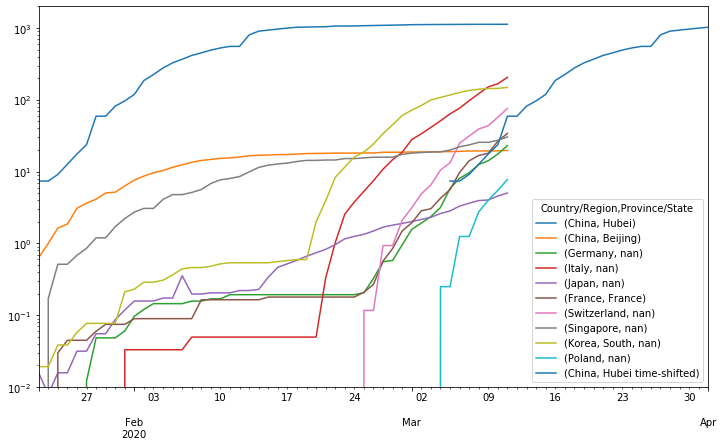

In [19]:
plt.close('all')
plt.rcParams['figure.figsize']=[12,7]
df6b.plot(kind='line',logy=True,ylim=(0.01,2000),xlim=("2020-01-22","2020-04-01"))

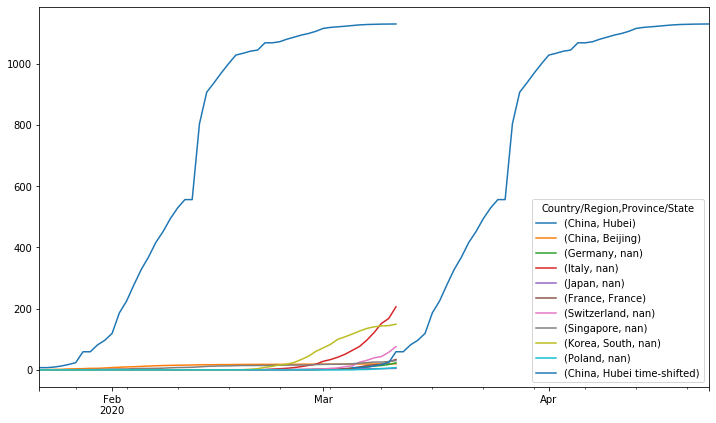

In [11]:
df6b.plot(kind='line')

In [ ]:
df6.loc[:,('Poland',np.nan)].to_string()

In [ ]:
df6.loc[:,('Poland',np.nan)]

In [ ]:
df5.loc[:,('Mainland China','Anhui')] /= 9999999.
df5.head(3)

In [ ]:
df5.to_csv("all.csv")

In [ ]:
df6['idx'] = df6.reset_index().index
df6.tail(3)

In [ ]:
df6.to_csv("reduced.csv",sep='\t',header=False)

In [ ]:
df6.iterrows?

In [ ]:
hb = df6["Mainland China"]["Hubei"]
hb.index = pd.date_range(start="2020-02-22",periods=hb.size)
hb.head(3)

In [ ]:
hb.index = pd.DatetimeIndex?

In [ ]:
pd.date_range(start="2020-01-22",periods=5)